<a href="https://colab.research.google.com/github/pdelolmo/pdelolmo-data/blob/main/Ana%CC%81lisis_de_descriptivo_de_los_datos_EDA_de_un_CRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Máster Universitario en Inteligencia de Negocio_

_Inteligencia de Cliente CRM_



# Actividad 01: Análisis descriptivo de los datos (EDA) de un CRM

En esta actividad llevaremos a cabo un análisis descriptivo de los datos provenientes del CRM de la empresa GoodTasteMarket.

GoodTasteMarket es una red de supermercados estadounidense con una amplia presencia en el norte de Europa cuya línea de negocio está centrada en productos de alimentación. Con el objetivo de redefinir sus estrategias comerciales y lanzar nuevas campañas de marketing, GoodTasteMarket pone en marcha un proyecto de análisis de los datos procedentes de su CRM a fin de obtener un conocimiento útil sobre el comportamiento de sus clientes y tomar decisiones informadas en el ámbito del marketing mix.

Para llevar a cabo este análisis disponemos de un conjunto de datos en formato .csv denominado **marketing_campaign.csv** con la siguiente descripción:

## Descripción del dataset:

- **ID**: Identificador único del cliente
- **Age**: Edad del cliente
- **Education**: Nivel educativo del cliente
0 - 'Basica'
1 - 'Secundaria'
2 - 'Grado'
3 - 'Master'
4 - 'Doctorado - PhD'

- **Marital_Status**: Estado civil del cliente
0 - 'Soltero/a'
1 - 'Pareja de hecho'
2 - 'Casado/a'
3 - 'Divorciado/a'
4 - 'Viudo/a'

- **Income**: Ingresos familiares anuales del cliente
- **Children**: Número de niños en el hogar del cliente
- **Seniority**: Antigüedad del cliente en la empresa
- **Recency**: Número de días transcurridos desde la última compra del cliente
- **Complain**: Quejas del cliente en los últimos 2 años (1 - si ha realizado alguna, 0 - si no ha realizado ninguna)
- **MntWines**: Cantidad gastada en vino en los últimos 2 años
- **MntFruits**: Cantidad gastada en fruta en los últimos 2 años
- **MntMeatProducts**: Cantidad gastada en carne en los últimos 2 años
- **MntFishProducts**: Cantidad gastada en pescado en los últimos 2 años
- **MntSweetProducts**: Cantidad gastada en dulces en los últimos 2 años
- **MntGoldProds**: Cantidad gastada en productos premium en los últimos 2 años
- **MntTotalSpent**: Cantidad total gastada en cualquier producto
- **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa
- **NumCatalogPurchases**: Número de compras realizadas a través de catálogo
- **NumStorePurchases**: Número de compras realizadas a través de tiendas físicas
- **NumTotalPurchases**: Número total de compras realizadas por cualquier canal
- **NumWebVisitsMonth**: Número de visitas al sitio web de la empresa en el último mes

### Paso 1. Importamos las librerías y cargamos el dataset

In [2]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Cargamos el dataset en Colab
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


###Paso 2: Describimos la estructura de los datos y sus principales estadísticas

In [4]:
# Leemos el dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['marketing_campaign.csv']), sep=',')
data.head(10)

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
0,5524,58138.0,58,635,88,546,172,88,88,8,...,4,7,0,2,0,0,1617,66,22,3
1,2174,46344.0,38,11,1,6,2,1,6,1,...,2,5,0,2,0,2,27,69,4,1
2,4141,71613.0,26,426,49,127,111,21,42,8,...,10,4,0,2,1,0,776,58,20,2
3,6182,26646.0,26,11,4,20,10,3,5,2,...,4,6,0,2,1,1,53,39,6,1
4,5324,58293.0,94,173,43,118,46,27,15,5,...,6,5,0,4,2,1,422,42,14,1
5,7446,62513.0,16,520,42,98,0,42,14,6,...,10,6,0,3,1,1,716,56,20,2
6,965,55635.0,34,235,65,164,50,49,27,7,...,7,6,0,2,3,1,590,52,17,3
7,6177,33454.0,32,76,10,56,3,1,23,4,...,4,8,0,4,2,1,169,38,8,2
8,4855,30351.0,19,14,0,24,3,3,2,3,...,2,9,0,4,1,1,46,49,5,2
9,5899,5648.0,68,28,0,6,1,1,13,1,...,0,20,0,4,1,2,49,73,1,1


In [5]:
# Vemos el número de variables e instancias que tiene el dataset
data.shape

(2240, 21)

**1**. ¿Cuántas variables tiene el dataset?



**Respuesta:**21

**2**. ¿Cuántas instancias tiene el dataset?

**Respuesta:** 2240

In [6]:
# Generamos estadísticas descriptivas  de los datos
data.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Int,Marital_Status_Int,Children,MntTotalSpent,Age,NumTotalPurchases,Seniority
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,...,5.790179,5.316518,0.009375,2.460268,1.480357,0.950446,605.798214,54.194196,12.537054,1.971875
std,3246.662198,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,...,3.250958,2.426645,0.096391,1.004337,1.047154,0.751803,602.249288,11.984069,7.205741,0.684554
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,27.000000,0.000000,1.000000
25%,2828.250000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,...,3.000000,3.000000,0.000000,2.000000,1.000000,0.000000,68.750000,46.000000,6.000000,2.000000
50%,5458.500000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,...,5.000000,6.000000,0.000000,2.000000,2.000000,1.000000,396.000000,53.000000,12.000000,2.000000
75%,8427.750000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,...,8.000000,7.000000,0.000000,3.000000,2.000000,1.000000,1045.500000,64.000000,18.000000,2.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,...,13.000000,20.000000,1.000000,4.000000,4.000000,3.000000,2525.000000,130.000000,32.000000,3.000000


**3**. Analizad en términos generales la distribución de los datos. Para llevar a cabo este análisis podéis haceros preguntas como: ¿Existe algún dato faltante? ¿Hay alguna media que nos resulte extraña o atípica? ¿El min y max de alguna de las variables os sugiere que puedan existir outliers? ¿Hemos observado alguna variable cuya concentración de los datos, cuartiles 25%, 50%, 75%, os resulte relevante para el análisis?

**Respuesta:** Si, existen datos faltantes: como podemos observar en la distribucuión de los datos todas las variables excepto 'Income' tienen un valor de 2240, mientras que 'Income' tiene 2216 por lo que hay un total de 24 valores faltantes. Por otro lado, también hay valores extraños por ejemplo en la Edad, cuyo máximo es de 130 y es bastante raro que esto suceda. El máximo de Income (666,666) también puede ser sospechoso teniendo en cuenta que la media es de 52,247.25.

In [7]:
#Generamos estadísticas de una variable concreta, la variable "Income"
data['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


**4**. Analizad los principales estadísticos de la variable **"Income"**: mean, std, min, cuartiles 25%, 50% 75% y max. Para llevar a cabo este análisis podéis responder a preguntas como :¿La media de ingresos es más/menos elevada? ¿Cuál es el rango de ingresos en el que se encuentra el 50% de los clientes?

**Respuesta**: La media de ingresos es bastante elevada (52247.251354
)  y el rango de ingresos en el que se encuentra el 50% de los clientes es 35,303 (P25)-68,522 (P75)

In [8]:
#Vemos qué tipo de variables contiene el dataset y qué valores no contienen nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2240 non-null   int64  
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
 13  Complain             2240 non-null   int64  
 14  Education_Int        2240 non-null   int64  
 15  Marital_Status_Int   2240 non-null   i

**5**. ¿Cuántas variables numéricas tiene el dataset? ¿Cuántas de tipo caracter o string?

**Respuesta** : Este dataset contiene un total de 21 variables numéricas (20 de tipo Int y 1 de tipo Float) y no cuenta con ninguna variable que represente una cadena de texto

**6**. ¿Existen valores nulos en el dataset? ¿Si es así, en qué variables?

**Respuesta:** Si, como podemos obersvar la variable Income contiene 2216 valores por lo que hay un total de 24 valores nulos

In [9]:
#Elegimos la variable "Complain" para ver los distintos valores que adopta y saber qué tipo de variable es
print('Complain: ',data['Complain'].unique())

Complain:  [0 1]


**7**. ¿Pensáis que la variable "Complain" es una variable categórica? Justificad vuestra respuesta.

**Respuesta:** Si, la variable Complain podría considerarse de tipo categórico ya que a pesar de ser números (0, 1), en este caso 1 no es mayor que 0, simplemente indica que es una categoría diferente (el cliente ha presentado una queja o no lo ha hecho)

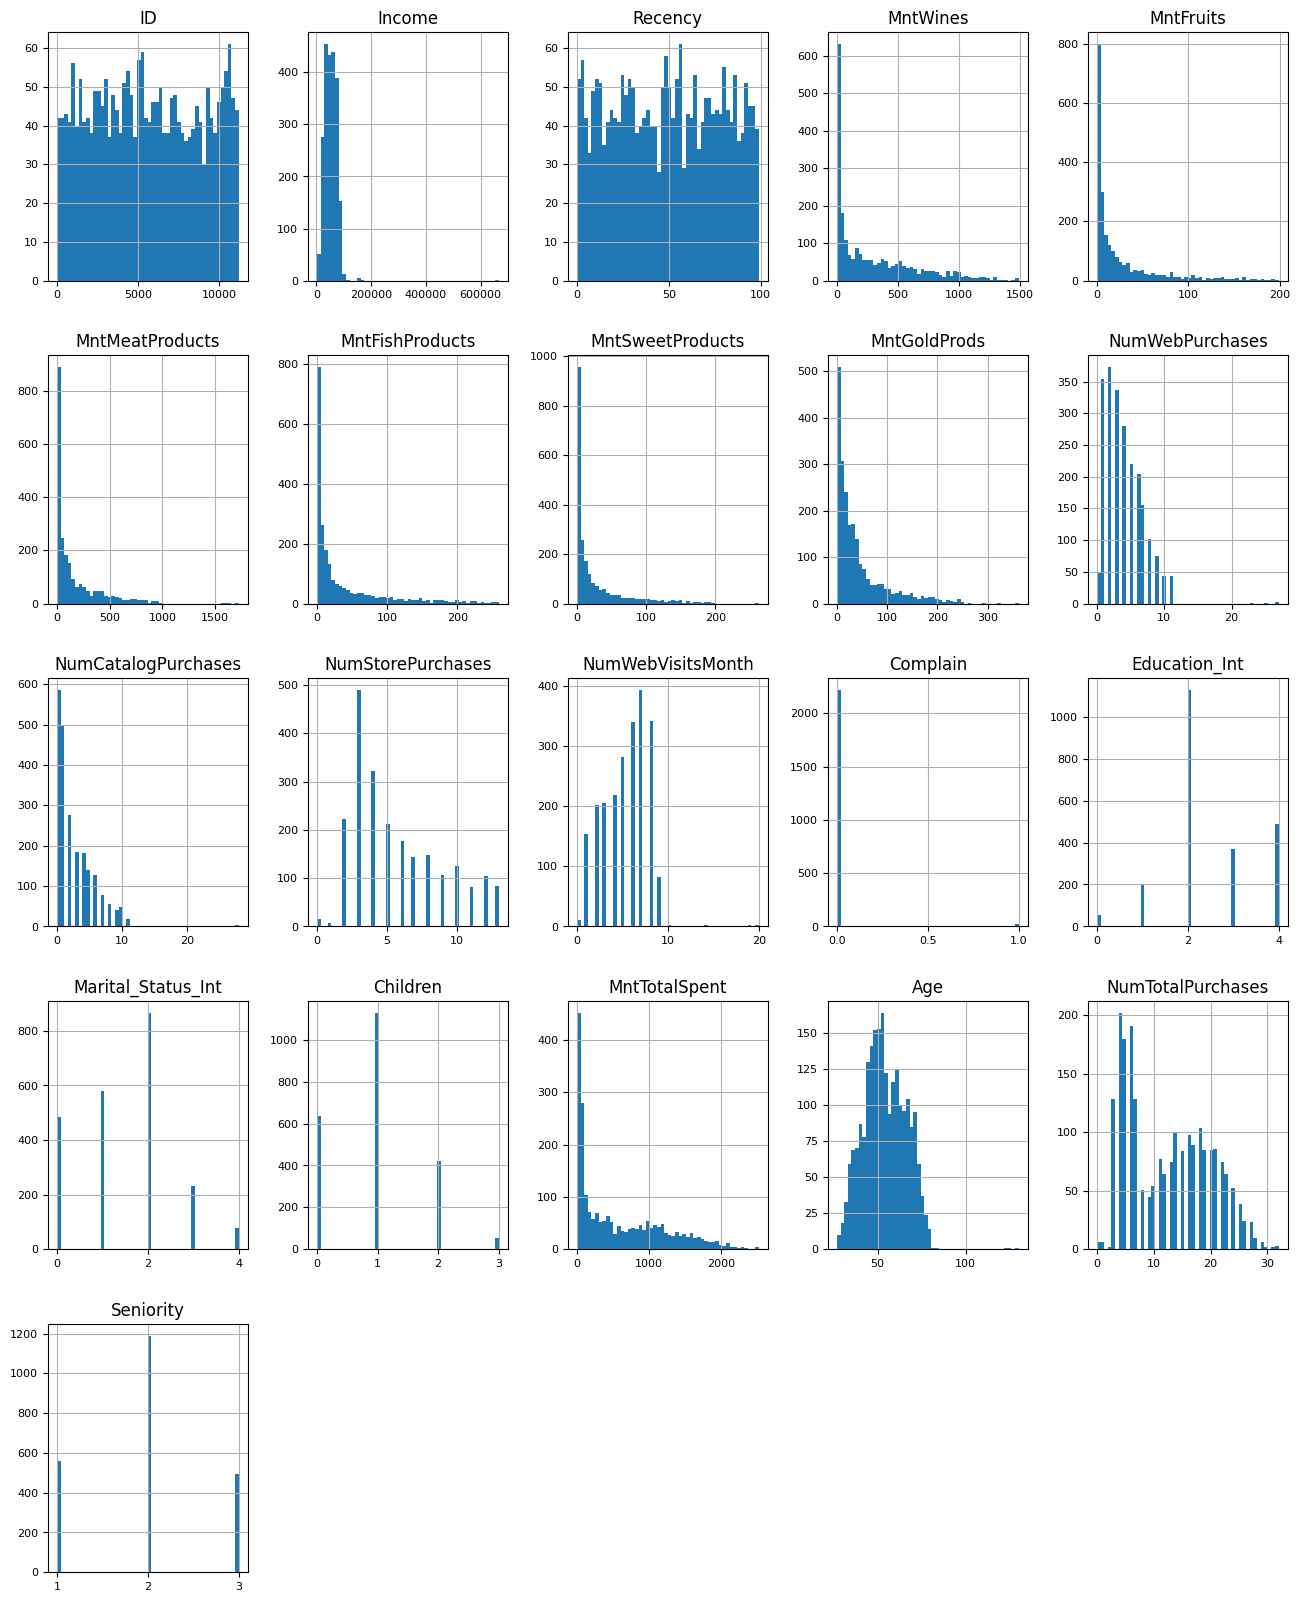

In [10]:
#Visualizamos los histogramas de las variables numéricas para conocer su distribución
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

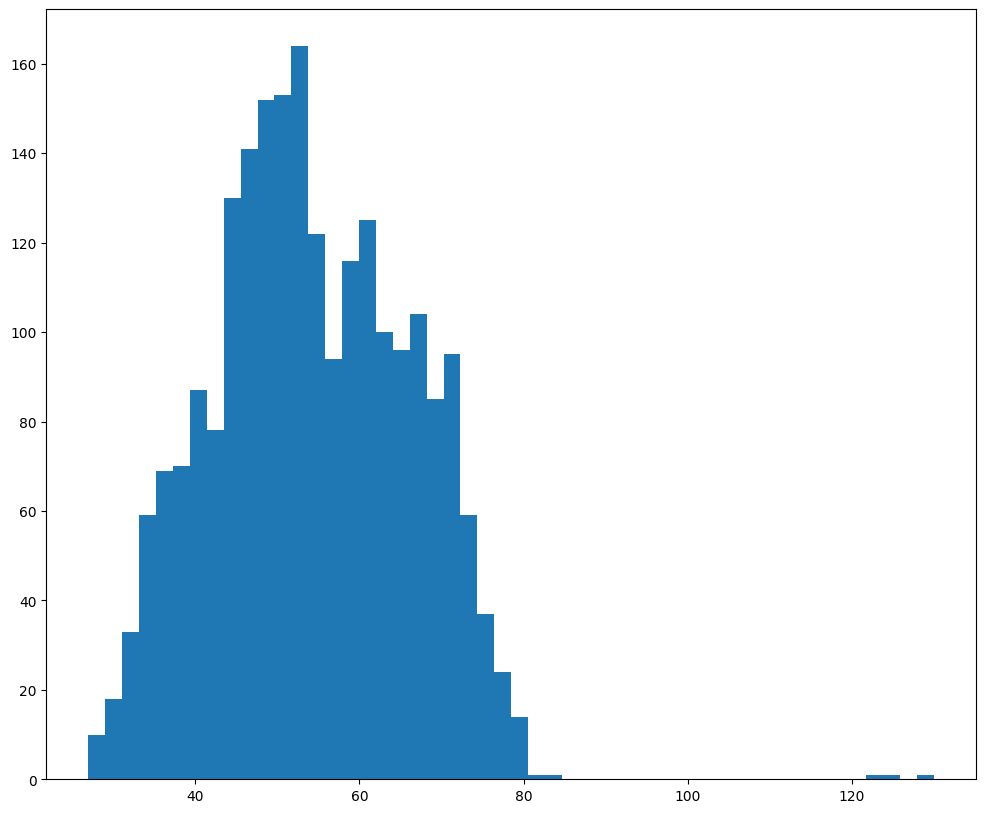

In [11]:
#Visualizamos el histograma de la variable Age
plt.figure(figsize=(12, 10))
plt.hist(data['Age'], bins=50);

 **8**.  Analizad la visualización del histograma. Podéis apoyaros en preguntas como ¿Qué edad predomina entre los clientes? ¿Cual es la edad de los clientes más jóvenes? ¿Y la de los más mayores? ¿Existe algún dato anómalo que pueda desvirtuar el análisis?

**Respuesta**: A simple vista parece que la edad más predominante entre los clientes se encuentra en torno a los 50 años, siendo el mínimo 27, y mucho menos frecuente. El valor máximo de edad es de 130 años, algo bastante sospechoso y poco realista

**9**. Escribid el código necesario para visualizar el histograma de la variable "MntWines".


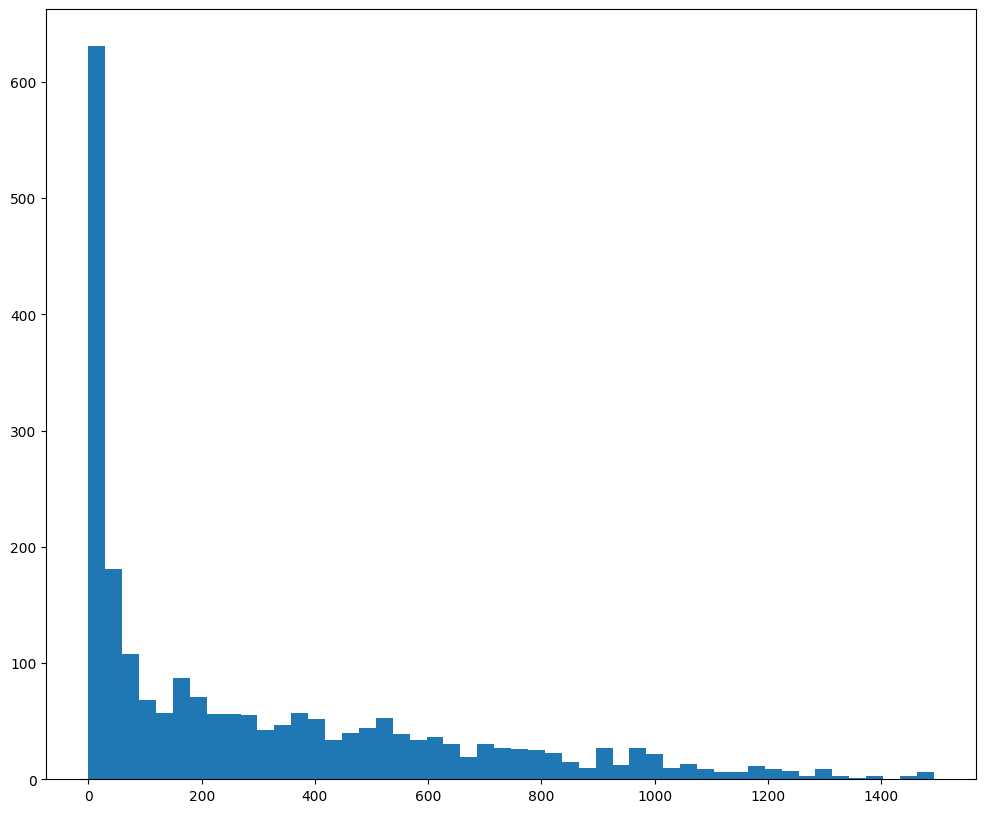

In [12]:
#Dibujamos el histograma de la variable "MNWines"

plt.figure(figsize=(12, 10))
plt.hist(data['MntWines'], bins=50);

 **10**. ¿Que nos dice el histograma sobre la distribución de esta variable?

**Respuesta:**El histograma de "MntWines" indica que la mayoría de clientes realizan gastos reducidos o nulos en vino, mientras que solo una minoría gasta cantidades elevadas


###Paso 3: Realizamos la limpieza de datos: Identificación de valores nulos e imputación de valores faltantes

In [13]:
#Visualizamos el total de valores nulos de las variables del dataset
data.isnull().sum()

,0
ID,0
Income,24
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0
NumWebPurchases,0


**11**. ¿Qué variables contienen valores nulos y qúé número de valores nulos?

**Respuesta:** Como podemos observar, sólo la variable 'Income' contiene valores nulos, concretamente 24


**12**. ¿Qué estrategias podemos llevar a cabo para hacer frente a la existencia de valores nulos o faltantes en una variable? ¿Cual de ellas elegiríais? Justificad vuestra elección.

**Respuesta:** Para hacer frente a los valores nulos, y teniendo en cuenta que en nuestro caso, sólo el 1% de los valores de la variable son nulos (24 de 2240), podríamos eliminar las filas que los contienen ya que tanmpoco afectaría mucho su representatividad. En otros casos es recomendable rellenar los valores faltantes con la media o la mediana (incluso con la moda si la variable es de tipo categórico)  

  

### Paso 4. Análisis de la relación entre variables

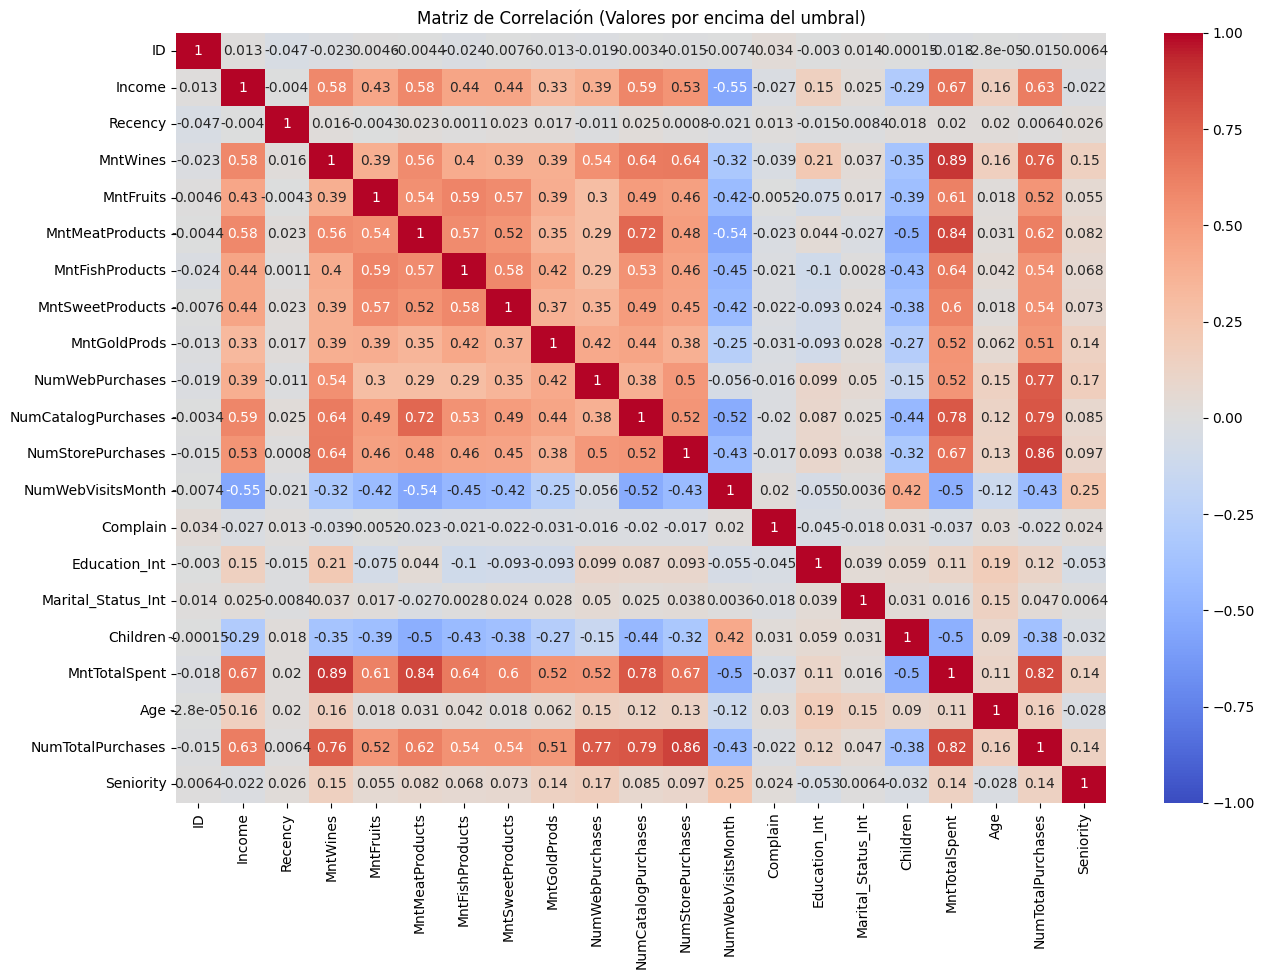

In [14]:
#Realizamos la matriz de correlación entre las variables
correlation_matrix = data.corr(method ='pearson')

# Crear un mapa de calor con seaborn
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación (Valores por encima del umbral)')
plt.show()

**13**. ¿Que información sobre la relación entre las variables que componen el dataset nos proporciona la matriz de correlación? Describe qué es una matriz de correlación y para qué sirve.

**Respuesta:** Una  matriz de correlación es una tabla que muestra cómo se relacionan entre sí distintas variables.. Al observar los coeficientes de correlación, podemos aprender cómo los cambios de una variable afectan a otras. Un valor de 1 implica una relación positiva (si aumenta una la otra también aumenta); un valor de -1 implica relación negativa (a medida que aumenta una, disminuye la otra); o 0 si no hay ningún tipo de relación.

**14**. Analiza los resultados de la matriz de correlación. Para llevar a cabo este análisis podéis plantearos preguntas cómo :¿Existe una relación fuerte entre variables? ¿Qué variables son estas? ¿Qué repercusión tiene para el análisis que las variables tengan una elevada correlación positiva/negativa?...


**Respuesta:** En este caso, podemos ver que variables como el estado civil, apenas tienen relación con el resto de variables o que variables como el gasto en vino correlacionan lógica y positivamente con el gasto total (0.89). El hecho de que haya una correlación positiva cercana a +1 indica que las variables están fuertemente relacionadas. Por otro lado, correlaciónes cercanas a -1 nos indican relaciones inversas y pueden proporcionarnos información útil o valiosa (por ejemplo que un  mayor número de visitas a la página web este relacionada con menos compras en tiendas físicas (-0.43)


### Paso 5. Análisis de outliers

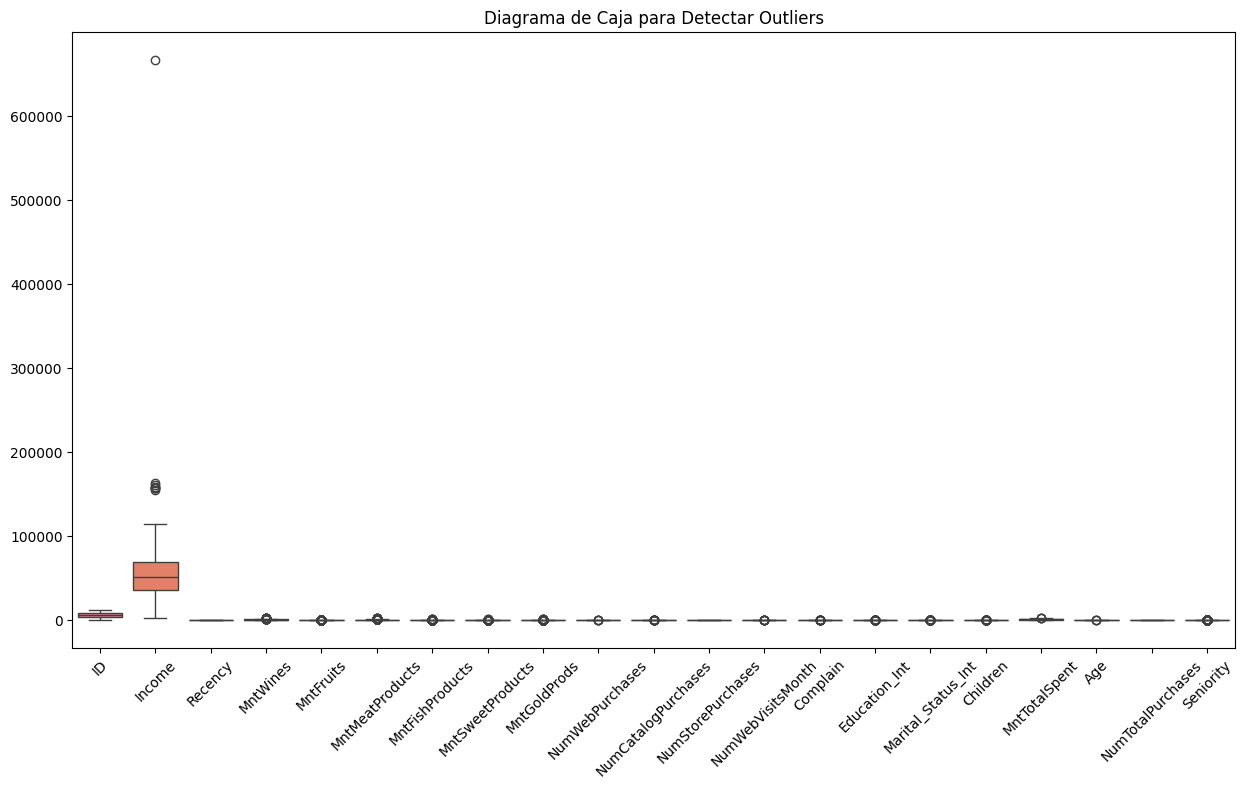

In [15]:
# Visualizamos los outliers en cada una de las variables utilizando un boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.title('Diagrama de Caja para Detectar Outliers')
plt.show()

**15**. ¿Existen variables que contengan outliers? Indicad cuales. * Si necesitáis verlas en mayor profundidad podéis generar un nuevo bloxpot de la variable en concreto*

**Respuesta:**Si, el valor máximo de la variable 'Income' es 666,666 y es bastante mayor que el P75 (68,522) por lo que claramente estamos ante un valor atípico

**16**. En la celda que se encuentra a continuación, escribid el código necesario para generar las estadísticas de las variables que contengan outliers.

In [ ]:
#Generamos estadísticas de las variables que continen outliers


**17**. ¿Qué repercusión tiene para el análisis la existencia de outliers en dichas variables?

### Paso 5.  Análisis de variables de interés: Conocimiento de cliente


Una vez visto cómo están distribuidos los datos, si existen valores faltantes y anómalos y llevado a cabo las limpiezas y tranformaciones necesarias,  haremos un análisis en mayor profundidad de aquellas variables que consideramos que nos proporcionan información relevante sobre el comportamiento y las características de nuestros clientes . Esta información puede ser:  el gasto en función de su edad, el tipo de canal de venta que más utilizan o el nivel educativo de aquellos que compran un determinado tipo de producto.

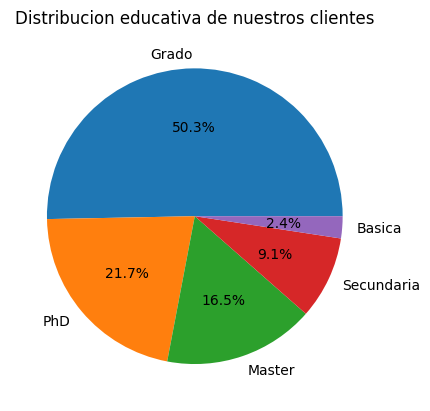

In [ ]:
# Analizamos el nivel educativo de los clientes. Para hacerlo visualizamos con un gráfico de torta
counts = data['Education_Int'].value_counts()

# Añadimos la leyenda
labels = ['Grado', 'PhD', 'Master', 'Secundaria', 'Basica']
plt.pie(counts, labels=labels, autopct='%1.1f%%')
# Añadimos el titulo
plt.title('Distribucion educativa de nuestros clientes')
# Dibujamos el gráfico
plt.show()

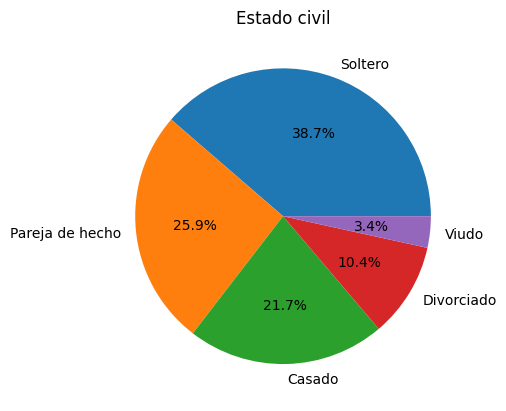

In [ ]:
# Analizamos el estado civil de los clientes. Para hacerlo visualizamos con un gráfico de torta
counts = data['Marital_Status_Int'].value_counts()

# Añadimos la leyenda
labels = ['Soltero', 'Pareja de hecho', 'Casado', 'Divorciado', 'Viudo']
plt.pie(counts, labels=labels, autopct='%1.1f%%')
# Añadimos el titulo
plt.title('Estado civil')
# Dibujamos el gráfico
plt.show()

Relación entre las variables seleccionadas


<Figure size 640x480 with 0 Axes>

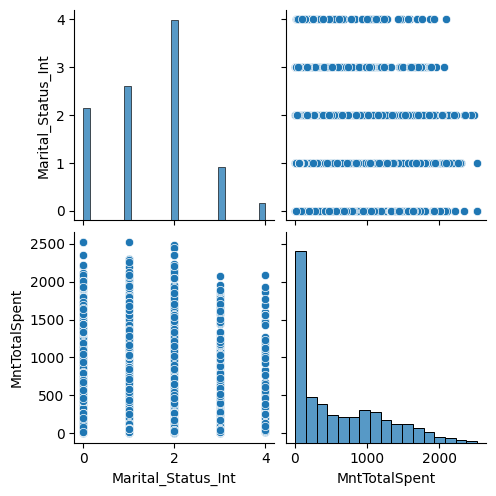

In [ ]:
#Analizamos la relación entre el estado civil del cliente y el gasto y lo representamos gráficamente.
To_Plot = [ "Marital_Status_Int", "MntTotalSpent"]
print("Relación entre las variables seleccionadas")
plt.figure()
# Crear un pairplot con las combinaciones de las variables seleccionadas
sns.pairplot(data[To_Plot])
# Mostrar el pairplot
plt.show()

<ipython-input-25-a6d13bc21432>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Children', y = 'MntTotalSpent', data = data, palette = 'cool')


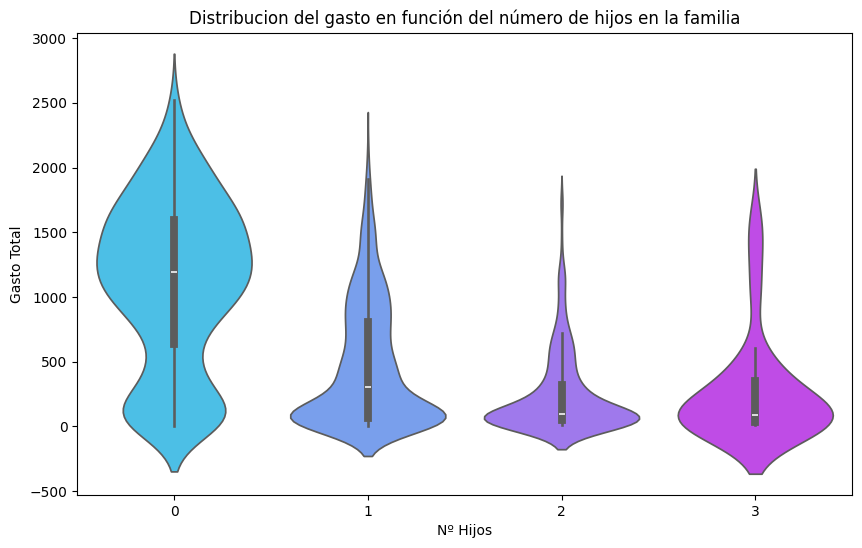

In [ ]:
# Analizamos la relación entre el número de hijos y el gasto total. Visulizamos con un gráfico de caja

# Seleccionamos el tamaño de la figura
plt.figure(figsize = (10, 6))

# Creamos el dibujo de violin
sns.violinplot(x = 'Children', y = 'MntTotalSpent', data = data, palette = 'cool')

# Definimos el titulo de la figura y de cada eje
plt.title('Distribucion del gasto en función del número de hijos en la familia')
plt.xlabel('Nº Hijos')
plt.ylabel('Gasto Total')

plt.show()

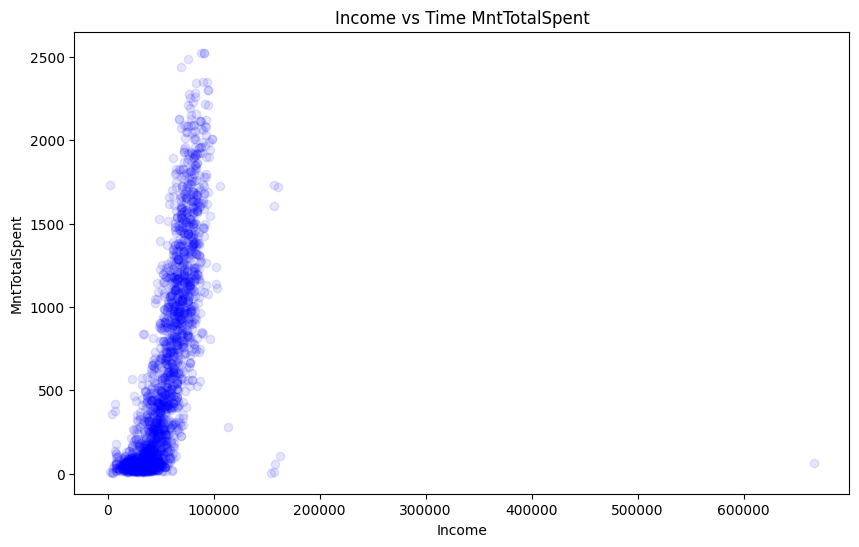

In [ ]:
# Analizamos la relación entre los ingresos de la unidad familiar (Income) y el gasto (MntTotalSpent). Visualizamos con un diagrama de dispersión

# Definimos el tamaño de la figura
plt.figure(figsize = (10, 6))

# Creamos la visualizacion, de tipo scatter plot
plt.scatter(data['Income'], data['MntTotalSpent'], color = 'blue', alpha = 0.1)

# Definimos la leyenda del gráfico
plt.xlabel('Income')
plt.ylabel('MntTotalSpent')

# Definimos el título del gráfico
plt.title('Income vs Time MntTotalSpent')
plt.show()

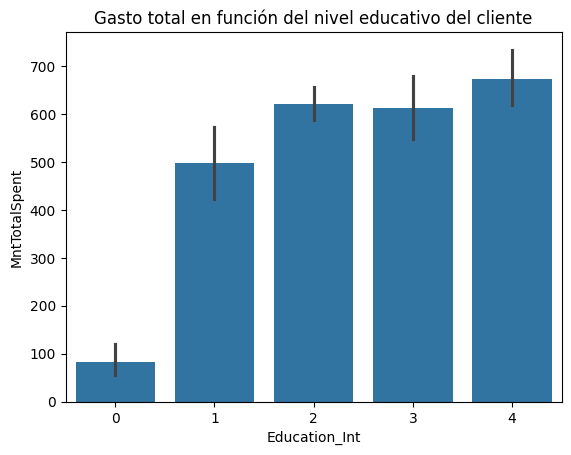

In [ ]:
#Analizamos la relación entre el nivel educativo del cliente y el gasto
sns.barplot(x = data['Education_Int'],y = data['MntTotalSpent']);
plt.title('Gasto total en función del nivel educativo del cliente');

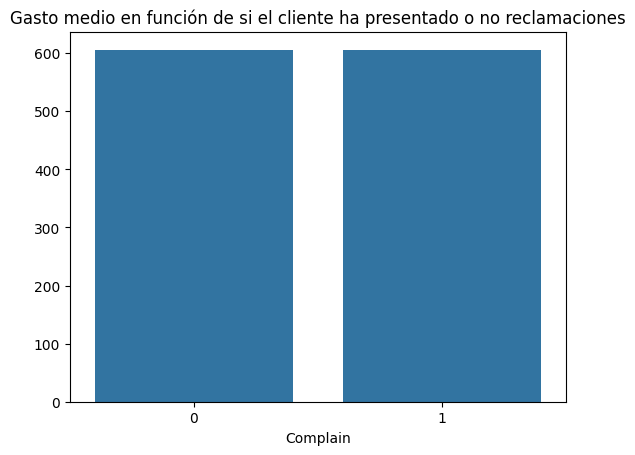

In [ ]:
#Analizamos la relación entre el gasto y el las quejas planteadas por el cliente.
sns.barplot(x = data['Complain'],y = data['MntTotalSpent'].mean());
plt.title('Gasto medio en función de si el cliente ha presentado o no reclamaciones');

<Figure size 1000x600 with 0 Axes>

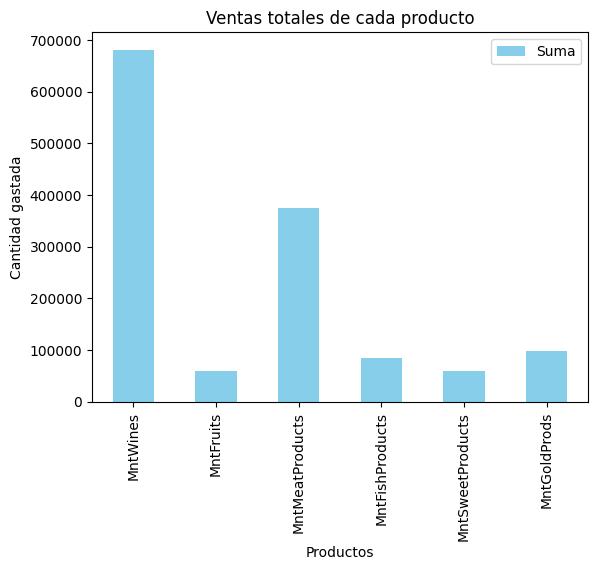

In [ ]:
# Analizamos las ventas por tipo de producto. Lo visualizamos con un gráfico de barras
suma_columna1 = data['MntWines'].sum()
suma_columna2 = data['MntFruits'].sum()
suma_columna3 = data['MntMeatProducts'].sum()
suma_columna4 = data['MntFishProducts'].sum()
suma_columna5 = data['MntSweetProducts'].sum()
suma_columna6 = data['MntGoldProds'].sum()

# Crear un DataFrame con las sumas de cada columna
df_suma = pd.DataFrame({'Columna': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                        'Suma': [suma_columna1, suma_columna2, suma_columna3, suma_columna4, suma_columna5, suma_columna6]})

# Crear el gráfico de barras para la suma de cada columna
plt.figure(figsize=(10, 6))
df_suma.plot(x='Columna', y='Suma', kind='bar', color='skyblue')
plt.xlabel('Productos')
plt.ylabel('Cantidad gastada')
plt.title('Ventas totales de cada producto')
plt.show()

<Figure size 1000x600 with 0 Axes>

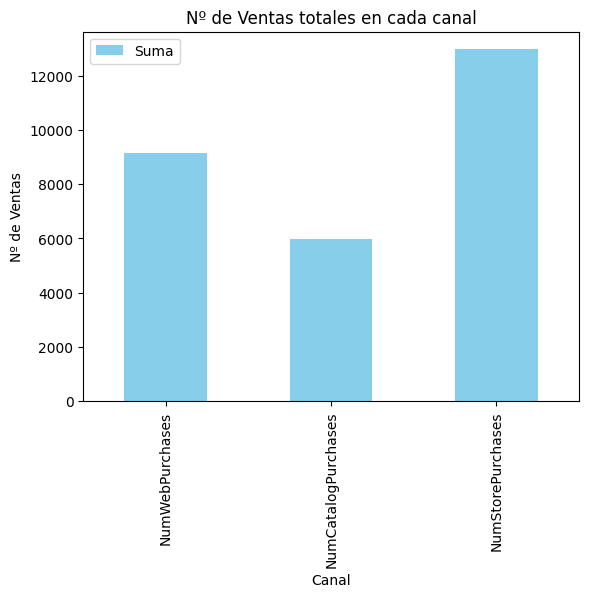

In [ ]:
# Analizamos las ventas por canal. Lo visualizamos con un gráfico de barras
suma_columna1 = data['NumWebPurchases'].sum()
suma_columna2 = data['NumCatalogPurchases'].sum()
suma_columna3 = data['NumStorePurchases'].sum()

# Crear un DataFrame con las sumas de cada columna
df_suma = pd.DataFrame({'Columna': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
                        'Suma': [suma_columna1, suma_columna2, suma_columna3]})

# Crear el gráfico de barras para la suma de cada columna
plt.figure(figsize=(10, 6))
df_suma.plot(x='Columna', y='Suma', kind='bar', color='skyblue')
plt.xlabel('Canal')
plt.ylabel('Nº de Ventas')
plt.title('Nº de Ventas totales en cada canal')
plt.show()

**18**. Realiza los análisis o comparativas de al menos dos variables que consideréis que pueden enriquecer el el análisis y ser útiles para el planteamiento de nuevas estrategias comerciales en el ámbito de las 4P

### Paso 6:  Informe de resultados y conclusiones

**19**. Elaborad un informe que contenga una descripción del **análisis de los datos** que habéis realizado. Este informe debe contener como mínimo los siguientes aspectos:

- Descripción de la tipología de cliente (edad, estado civil,número de hijos...)
- Descripción del comportamiento del cliente (productos que compran, canales de venta que utilizan)
- Detalle de los resultados o conclusiones alcanzadas en el análisis.

Para realizar este informe será necesario que analicéis otras variables de interés además de las ya analizadas. Podéis apoyaros para ello en la creación de visualizaciones, son de gran ayuda.

INFORME DEL ANÁLISIS DE DATOS DE CLIENTE

**1. Descripción de la tipología de cliente**

-Edad: la edad media de los clientes se sitúa en 54 años con un rango que va desde los 27 a los 130 años (seguramente este un error en el registro). La gran mayoría de los clientes se encuentran entreo los 40 y los 60 años.

-Estado civil: el estado civil más común de este dataset es la relación de pareja con una media de 1 hijo por cliente. Además el 30% de los clientes no tienen hijos lo que podría afectar en los gastos que realiza

-Nivel de ingresos: la media de los ingresos se sitúa en 52,247 euros con una desviación típica de 25,173 indica que hay gran variabilidad  en los ingresos de los clientes (algunos clientes ganan mucho más o mucho menos que la media)

**2. Descripción del comportamiento del cliente**

-Productos más comprados: como podemos observar, el vino es el producto que más compran los clientes, con un gasto medio de 303 euros. Sin embargo, gran parte de los clientes (50%) gasta menos de 173 euros y sólo un pequeño porcentaje realiza compras mayores. En segundo producto más demandado es la carne, con un gasto medio de 166 euros y otros como frutas o pescado son todavía menos demandados.

-Canales de compra: el método de compra más utilizado es la tienda física, con una media de 5.8 compras por cliente. Después las compras online (4 compras por cliente) y por último las compras a través de catálogos

**3. Detalle de los resultados o conclusiones alcanzadas en el análisis.**

-Presencia de valores atípicos o outliers: variables como Income o Age contienen valroes extremos e inusuales que podrían estar afectando los resultados de los análisis realizados. Deberían tenerse en cuenta y tomarlos con cautela.

-Clara preferencia por tiendas físicas: la mayoría de los clientes prefiere comprar físicamente, por lo que se podrían tomar decisiones como incentivar o dar algún tipo de ventaja a los clientes que compren vía online o a través del catálogo

-Parece que prodcutos como el vino o la carne se encuentran muy concentrados en valores bajos y que productos como frutas o dulces son bastante limitados y podrían requerir de algún tipo de promoción


### Paso 7: Propuesta para el lanzamiento de nuevas estrategias comerciales
**20**.  Elaborad una propuesta con al menos 3 recomendaciones para el lanzamiento de nuevas estrategias comerciales en el ámbito del marketing mix y las 4P (producto, precio, distribución y comunicación).
Esta propuesta debe estar basada y justificada en el análisis de los datos disponibles que hemos realizado. **Es importante que baséis vuestras recomendaciones en datos, datos concretos y dentro del dominio del problema que tratamos de resolver**. Esta propuesta debe contener como mínimo los siguientes aspectos:

- Oportunidades comerciales que habéis identificado en base al análisis realizado.
- Recomendaciones de estrategias comerciales en torno a las 4P. Estas pueden estar orientadas por ejemplo a ajustes en la oferta y la demanda, estrategias de precio en función del segmento...etc.